In [1]:
import sys
import os
import re
import joblib
import pandas as pd
import numpy as np
import dateutil
from scipy import stats
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from keras.models import load_model
sys.path.append('../')
from utilities.ANN_functions import root_mean_squared_error, r2_keras_loss, r2_keras

In [2]:
date_parser = lambda x: dateutil.parser.parse(x, ignoretz=True)

In [3]:
dir_ann = '../RF/LOYSO/CV/'
models = sorted(os.listdir(dir_ann))

In [4]:
def xgb_predictions(X):
    predictions = {}
    for pkl_file in models:
        file_num = int(re.search(r'\d+', pkl_file).group())
        str_model = os.path.join(dir_ann, pkl_file)
        xgb = joblib.load(str_model)
        y_pred = xgb.predict(X)
        predictions[file_num] = y_pred

    new_df = pd.DataFrame(predictions)
    new_df = new_df[sorted(new_df.columns)]

    return new_df

In [50]:
# Load data
cs_file = '../data/SMB_input_2011_2015.csv'

df = pd.read_csv(cs_file,
   delimiter='\t', index_col=['Date/Time'],
    parse_dates=['Date/Time'], na_values='NAN',date_parser=date_parser)

In [51]:
X = (df.drop(['Diff', 'Event'], axis=1)).to_numpy()
y = (df['Diff'].copy()).to_numpy()

,Latitude,Longitude,Elevation [m],TTT [°C],RH [%],ff [m/s],SWD [W/m**2],LWD [W/m**2],Precip [mm/h],PPPP [hPa],Clouds [octa],t2m_an,PDD
Date/Time,,,,,,,,,,,,,
2011-10-15,-62.227069,-58.598800,247.9,-0.899004,91.638391,6.485594,249.901906,282.734929,0.0,964.930363,6.988032,0.723846,0.0
2012-01-16,-62.227069,-58.598800,247.9,-0.899004,91.638391,6.485594,249.901906,282.734929,340.3,964.930363,6.988032,0.723846,23.0
2012-07-23,-62.227069,-58.598800,247.9,-4.230510,89.946682,9.005647,81.792149,265.147368,493.6,966.763443,6.748684,-0.021214,35.0
2012-07-27,-62.227069,-58.598800,247.9,-6.910733,92.082917,8.983917,21.404167,265.291667,47.1,946.991667,7.150000,-0.620622,0.0
2012-08-15,-62.227069,-58.598800,247.9,-8.300983,90.791417,10.889333,32.125000,259.160417,32.4,959.572292,7.312500,-0.931539,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-29,-62.237672,-58.633624,96.8,-7.297918,84.906887,10.343701,19.836765,251.431373,10.0,956.415931,6.502451,-0.909965,0.0
2015-08-21,-62.237672,-58.633624,96.8,-6.177133,90.624184,12.397500,35.040104,245.300347,49.7,953.878125,6.272569,-0.659312,0.0
2015-09-14,-62.237672,-58.633624,96.8,-8.263750,91.988350,10.393483,63.852833,245.680000,32.1,944.354333,7.008333,-1.125964,0.0


In [7]:
df_smb = xgb_predictions(X)

In [8]:
df_smb = df_smb.mean(axis=1).to_frame()
df_smb['OBS'] = y
df_smb.rename( columns={0 :'SIM'}, inplace=True )

In [9]:
x_aws = df_smb['OBS'].values
y_aws = df_smb['SIM'].values

In [10]:
slope_aws, intercept_aws, r_value_aws, p_value_aws, std_err_aws = stats.linregress(x_aws,y_aws)

In [11]:
print('r-squared:', r_value_aws**2)
print('RMSE:', np.sqrt(mean_squared_error(x_aws,y_aws)))
print('N:', len(y_aws))

r-squared: 0.9694169179166863
RMSE: 0.052743888804027805
N: 1037


In [12]:
# Calculate the point density
xy = np.vstack([x_aws,y_aws])
z_aws = gaussian_kde(xy)(xy)

In [13]:
dir_ann = '../RF/LOYSO_ERA5/CV/'
models = sorted(os.listdir(dir_ann))

In [47]:
# Load data
cs_file = '../data/SMB_input_2011_2016_ERA5.csv'

df = pd.read_csv(cs_file,
   delimiter='\t', index_col=['Date/Time'],
    parse_dates=['Date/Time'], na_values='NAN',date_parser=date_parser)

In [49]:
X = (df.drop(['Diff', 'Event'], axis=1)).to_numpy()
y = (df['Diff'].copy()).to_numpy()

In [16]:
df_smb = xgb_predictions(X)

In [17]:
df_smb = df_smb.mean(axis=1).to_frame()
df_smb['OBS'] = y
df_smb.rename( columns={0 :'SIM'}, inplace=True )

In [18]:
x_era = df_smb['OBS'].values
y_era = df_smb['SIM'].values

In [19]:
slope_era, intercept_era, r_value_era, p_value_era, std_err_era = stats.linregress(x_era,y_era)

In [20]:
print('r-squared:', r_value_era**2)
print('RMSE:', np.sqrt(mean_squared_error(x_era,y_era)))
print('N:', len(y_era))

r-squared: 0.9662882429098892
RMSE: 0.057889021458647265
N: 1131


In [21]:
# Calculate the point density
xy = np.vstack([x_era,y_era])
z_era = gaussian_kde(xy)(xy)

In [22]:
# ANN
dir_ann = '../ANN/LOYSO/CV/'
models = sorted(os.listdir(dir_ann))

In [23]:
def xgb_predictions_ann(X):
    predictions = {}
    for pkl_file in models:
        file_num = int(re.search(r'\d+', pkl_file).group())
        str_model = os.path.join(dir_ann, pkl_file)
        xgb = load_model(str_model, custom_objects={"r2_keras": r2_keras, 
                                                    "r2_keras_loss": r2_keras_loss, 
                                                    "root_mean_squared_error": root_mean_squared_error})
        y_pred = xgb.predict(X)
        predictions[file_num] = y_pred[:,0]

    new_df = pd.DataFrame(predictions)
    new_df = new_df[sorted(new_df.columns)]

    return new_df

In [24]:
# Load data
cs_file = '../data/SMB_input_2011_2015.csv'

df = pd.read_csv(cs_file,
   delimiter='\t', index_col=['Date/Time'],
    parse_dates=['Date/Time'], na_values='NAN',date_parser=date_parser)

In [25]:
X = (df.drop(['Diff', 'Event'], axis=1)).to_numpy()
y = (df['Diff'].copy()).to_numpy()

In [26]:
df_smb = xgb_predictions_ann(X)

2022-07-12 19:13:26.023036: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
df_smb = df_smb.mean(axis=1).to_frame()
df_smb['OBS'] = y
df_smb.rename( columns={0 :'SIM'}, inplace=True )
x_aws_ann = df_smb['OBS'].values
y_aws_ann = df_smb['SIM'].values
slope_aws_ann, intercept_aws_ann, r_value_aws_ann,p_value_aws_ann, std_err_aws_ann = stats.linregress(x_aws_ann,y_aws_ann)

In [28]:
print('r-squared:', r_value_aws_ann**2)
print('RMSE:', np.sqrt(mean_squared_error(x_aws_ann,y_aws_ann)))
print('N:', len(y_aws_ann))

r-squared: 0.6668930145389986
RMSE: 0.16565154961577438
N: 1037


In [29]:
# Calculate the point density
xy = np.vstack([x_aws_ann,y_aws_ann])
z_aws_ann = gaussian_kde(xy)(xy)

In [30]:
dir_ann = '../ANN/LOYSO_ERA5/CV/'
models = sorted(os.listdir(dir_ann))

In [40]:
# Load data
cs_file = '../data/SMB_input_2011_2016_ERA5.csv'

df = pd.read_csv(cs_file,
   delimiter='\t', index_col=['Date/Time'],
    parse_dates=['Date/Time'], na_values='NAN',date_parser=date_parser)

In [41]:
df

,Event,Latitude,Longitude,Elevation [m],Diff,t2m,rh,u2,SWin,LWin,tp,sf,msl,press,tcc,t2m_an,PDD
Date/Time,,,,,,,,,,,,,,,,,
2011-10-15,PG05,-62.227069,-58.598800,247.9,1.20,-2.045971,89.729030,11.097322,197.464660,277.68912,0.000000,0.284484,986.98060,958.19070,0.837007,0.579418,0.0
2012-01-16,PG05,-62.227069,-58.598800,247.9,0.06,-2.045971,89.729030,11.097322,197.464660,277.68912,0.330698,0.284484,986.98060,958.19070,0.837007,0.579418,2.0
2012-07-23,PG05,-62.227069,-58.598800,247.9,-0.01,-4.436262,87.112170,10.405537,71.930756,265.58890,0.652318,0.534880,989.84850,960.91345,0.836653,-0.002080,13.0
2012-07-27,PG05,-62.227069,-58.598800,247.9,0.04,-6.443640,84.106926,7.731137,10.427926,260.72766,0.028112,0.028108,969.90290,941.50600,0.838783,-0.490424,0.0
2012-08-15,PG05,-62.227069,-58.598800,247.9,0.10,-7.705368,87.027720,8.454102,18.701515,254.76392,0.089141,0.088950,984.85834,956.00500,0.889259,-0.797371,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-17,PG19,-62.237672,-58.633624,96.8,-0.43,-0.284498,85.731510,9.542617,207.966920,274.65402,0.098277,0.078189,987.89500,976.44020,0.800041,0.676566,18.0
2016-02-25,PG19,-62.237672,-58.633624,96.8,-0.20,0.197350,89.256035,8.389152,127.560770,287.32523,0.029791,0.017373,978.77210,967.44150,0.913182,0.796762,5.0
2016-03-10,PG19,-62.237672,-58.633624,96.8,-0.45,0.442562,91.217650,9.195325,110.797840,284.02000,0.026133,0.010307,992.81160,981.32086,0.792833,0.857929,13.0


In [46]:
X = (df.drop(['Diff', 'Event'], axis=1)).to_numpy()
y = (df['Diff'].copy()).to_numpy()

In [33]:
df_smb = xgb_predictions_ann(X)

In [34]:
df_smb = df_smb.mean(axis=1).to_frame()
df_smb['OBS'] = y
df_smb.rename( columns={0 :'SIM'}, inplace=True )
x_era_ann = df_smb['OBS'].values
y_era_ann = df_smb['SIM'].values
slope_era_ann, intercept_era_ann, r_value_era_ann,p_value_era_ann, std_err_era_ann = stats.linregress(x_era_ann,y_era_ann)

In [35]:
print('r-squared:', r_value_era_ann **2)
print('RMSE:', np.sqrt(mean_squared_error(x_era_ann ,y_era_ann )))
print('N:', len(y_era_ann ))

r-squared: 0.5206504643629484
RMSE: 0.20113569437222992
N: 1131


In [36]:
# Calculate the point density
xy = np.vstack([x_era_ann,y_era_ann])
z_era_ann = gaussian_kde(xy)(xy)

In [37]:
x_int = np.arange(-3,2,0.1)

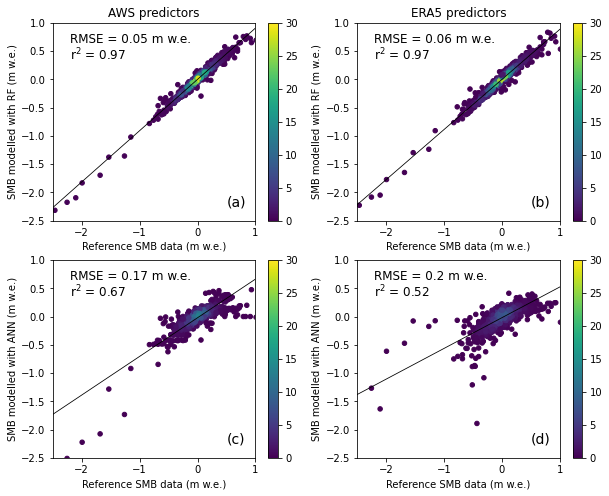

In [39]:
fig, ((ax, ax1), (ax2, ax3)) = plt.subplots(2,2,figsize=(10,8))

density = ax.scatter(x_aws, y_aws, c=z_aws, s=20, vmin=0, vmax=30)
ax.plot(x_int, intercept_aws + slope_aws * x_int, linewidth=0.8, color='k', linestyle ='-')
fig.colorbar(density, ax=ax)
ax.set_title('AWS predictors')
ax.set_xlabel('Reference SMB data (m w.e.)')
ax.set_ylabel('SMB modelled with RF (m w.e.)')
ax.set_ylim(-2.5, 1)
ax.set_xlim(-2.5, 1)
ax.text(-2.2, 0.65,'RMSE'+' = '+str(round(np.sqrt(mean_squared_error(x_aws,y_aws)),2))+' '+'m w.e.', fontsize=12)
ax.text(-2.2, 0.35,'r$^{2}$'+' = '+str(round(r_value_aws**2,2)), fontsize=12)
ax.text(0.5, -2.25,'(a)', fontsize=14)

density = ax1.scatter(x_era, y_era, c=z_era, s=20, vmin=0, vmax=30)
ax1.plot(x_int, intercept_era + slope_era * x_int, linewidth=0.8, color='k', linestyle ='-')
fig.colorbar(density, ax=ax1)
ax1.set_title('ERA5 predictors')
ax1.set_xlabel('Reference SMB data (m w.e.)')
ax1.set_ylabel('SMB modelled with RF (m w.e.)')
ax1.set_ylim(-2.5, 1)
ax1.set_xlim(-2.5, 1)
ax1.text(-2.2, 0.65,'RMSE'+' = '+str(round(np.sqrt(mean_squared_error(x_era,y_era)),2))+' '+'m w.e.', fontsize=12)
ax1.text(-2.2, 0.35,'r$^{2}$'+' = '+str(round(r_value_era**2,2)), fontsize=12)
ax1.text(0.5, -2.25,'(b)', fontsize=14)

density = ax2.scatter(x_aws_ann, y_aws_ann, c=z_aws_ann, s=20, vmin=0, vmax=30)
ax2.plot(x_int, intercept_aws_ann + slope_aws_ann * x_int, linewidth=0.8, color='k', linestyle ='-')
fig.colorbar(density, ax=ax2)
#ax2.set_title('AWS predictors')
ax2.set_xlabel('Reference SMB data (m w.e.)')
ax2.set_ylabel('SMB modelled with ANN (m w.e.)')
ax2.set_ylim(-2.5, 1)
ax2.set_xlim(-2.5, 1)
ax2.text(-2.2, 0.65,'RMSE'+' = '+str(round(np.sqrt(mean_squared_error(x_aws_ann,y_aws_ann)),2))+' '+'m w.e.', fontsize=12)
ax2.text(-2.2, 0.35,'r$^{2}$'+' = '+str(round(r_value_aws_ann**2,2)), fontsize=12)
ax2.text(0.5, -2.25,'(c)', fontsize=14)

density = ax3.scatter(x_era_ann, y_era_ann, c=z_era_ann, s=20, vmin=0, vmax=30)
ax3.plot(x_int, intercept_era_ann + slope_era_ann * x_int, linewidth=0.8, color='k', linestyle ='-')
fig.colorbar(density, ax=ax3)
#ax3.set_title('ERA5 predictors')
ax3.set_xlabel('Reference SMB data (m w.e.)')
ax3.set_ylabel('SMB modelled with ANN (m w.e.)')
ax3.set_ylim(-2.5, 1)
ax3.set_xlim(-2.5, 1)
ax3.text(-2.2, 0.65,'RMSE'+' = '+str(round(np.sqrt(mean_squared_error(x_era_ann,y_era_ann)),2))+' '+'m w.e.', fontsize=12)
ax3.text(-2.2, 0.35,'r$^{2}$'+' = '+str(round(r_value_era_ann**2,2)), fontsize=12)
ax3.text(0.5, -2.25,'(d)', fontsize=14)

fig.savefig('../fig/scatter_plot_RF_ANN.png',dpi = 200, bbox_inches = 'tight', 
             pad_inches = 0.1, facecolor='w')